In [1]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings("ignore")

# 2.1

In [7]:
beta = 0.442
delta = 0.6415
sigma = 3
A = 1
alpha = 0.35
nvec = np.array([1.0, 1.0, 0.2])
f_params = (nvec, A, alpha, delta)

In [15]:
def feasible(f_params, bvec_guess):
    nvec, A, alpha, delta = f_params
    b2, b3 = bvec_guess
    K = sum(bvec_guess)
    L = sum(nvec)
    r = alpha * A * (L / K) ** (1 - alpha) - delta  
    w =  (1 - alpha)* A * (K / L) ** alpha
    c1 = nvec[0] * w - b2
    c2 = nvec[1] * w + (1 + r) * b2 - b3
    c3 = nvec[2] * w + (1 + r) * b3   
    K_cnstr = (K <= 0)
    c_cnstr = (c1 <= 0, c2 <= 0, c3 <=0)
    b_cnstr = ((c1 <= 0) or (c2 <= 0),  (c2 <= 0) or (c3 <=0))
    
    return K_cnstr, b_cnstr, c_cnstr

a)

In [16]:
nvec = np.array([1.0, 1.0, 0.2])
bvec_guess = np.array([1.0, 1.2])
f_params = [nvec, A, alpha, delta]
feasible(f_params, bvec_guess)

(False, (True, False), (True, False, False))

As shown above, the constraint on consumption in period1 is violated.

b)

In [17]:
feasible(f_params, np.array([0.06, -0.001]))

(False, (False, False), (False, False, False))

As shown above, no constraints are violated.

#### c.

In [18]:
feasible(f_params, np.array([0.1, 0.1]))

(False, (False, False), (False, False, False))

As shown above, no constraints are violated.

# 2.2

In [22]:
def Eul_Eq(bvec, args):
    beta, sigma, nvec, L, A, alpha, delta, SS_tol = args
    b2, b3 = bvec
    K = sum(bvec)
    L = sum(nvec)
    r = alpha * A * (L / K) ** (1 - alpha) - delta  
    w = (1 - alpha) * A * (K / L) ** alpha
    c1 = w * nvec[0] - b2
    c2 = w * nvec[1] + (1 + r) * b2 - b3
    c3 = w * nvec[2] + (1 + r) * b3
    c = [c1, c2, c3] 
    err1 = (c1 ** (-sigma)) - beta * (1 + r) * (c2 ** (-sigma)) 
    err2 = (c2 ** (-sigma)) - beta * (1 + r) * (c3 ** (-sigma))
    errs = np.array([err1, err2])   
    
    return errs

def get_SS(params, bvec_guess, SS_graphs):
    start_time = time.time() 
    beta, sigma, nvec, L, A, alpha, delta, SS_tol = params  
    b_ss = opt.root(Eul_Eq, bvec_guess, args = np.array(params)).x
    b2, b3 = b_ss
    K_ss = sum(b_ss)
    r_ss = alpha * A * (L / K_ss) ** (1 - alpha) - delta
    w_ss = (1 - alpha) * A * (K_ss / L) ** alpha
    Y_ss = A * K_ss ** alpha * L **(1 - alpha)
    
    c1   = w_ss * nvec[0] - b2
    c2   = w_ss * nvec[1] + (1 + r_ss) * b2 - b3
    c3   = w_ss * nvec[2] + (1 + r_ss) * b3 
    c_ss = np.array([c1, c2, c3])
    C_ss = sum(c_ss) 
   
    err1 = (c_ss[0] ** (-sigma)) - beta * (1 + r_ss) * (c_ss[1] ** (-sigma)) 
    err2 = (c_ss[1] ** (-sigma)) - beta * (1 + r_ss) * (c_ss[2] ** (-sigma))
    EulErr_ss = np.array([err1, err2])
    RCerr_ss = Y_ss - C_ss - delta * K_ss
    
    ss_time = time.time() - start_time
    ss_output = {'b_ss': b_ss, 'c_ss': c_ss, 'w_ss': w_ss, 'r_ss': r_ss,
                 'K_ss': K_ss, 'Y_ss': Y_ss, 'C_ss': C_ss, 'EulErr_ss': EulErr_ss,
                 'RCerr_ss': RCerr_ss, 'ss_time': ss_time}
   
    if SS_graphs:
        plt.plot((1, 2, 3), c_ss, label='consumptions')
        plt.plot((2, 3),  b_ss, label='savings')
        plt.title('Steady State Consumption and Savings')
        plt.xlabel('Age')
        plt.ylabel('Consumptions and Savings')
        plt.legend();
    return ss_output

a)

In [121]:
SS_tol = 1e-9
bvec_guess = np.array([0.1, 0.1])
params = (beta, sigma, nvec, sum(nvec), A, alpha, delta, SS_tol)
ss_output1 = get_SS(params, bvec_guess, False)
ss_output1

{'b_ss': array([0.01931253, 0.0584111 ]),
 'c_ss': array([0.18241213, 0.20961468, 0.24087387]),
 'w_ss': 0.20172465739052575,
 'r_ss': 2.433062339127069,
 'K_ss': 0.07772362575316386,
 'Y_ss': 0.6827603788602411,
 'C_ss': 0.6329006729395864,
 'EulErr_ss': array([-1.39266376e-12,  2.62900812e-12]),
 'RCerr_ss': 8.326672684688674e-17,
 'ss_time': 0.0017273426055908203}

b)

{'b_ss': array([0.01931253, 0.0584111 ]),
 'c_ss': array([0.18241213, 0.20961468, 0.24087387]),
 'w_ss': 0.20172465739052575,
 'r_ss': 2.433062339127069,
 'K_ss': 0.07772362575316386,
 'Y_ss': 0.6827603788602411,
 'C_ss': 0.6329006729395864,
 'EulErr_ss': array([-1.39266376e-12,  2.62900812e-12]),
 'RCerr_ss': 8.326672684688674e-17,
 'ss_time': 0.001996755599975586}

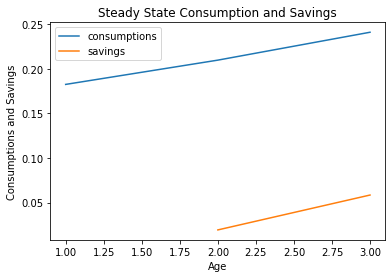

In [24]:
get_SS(params, bvec_guess, True)

c)

{'b_ss': array([0.02817692, 0.07686545]),
 'c_ss': array([0.19597528, 0.22861594, 0.26669307]),
 'w_ss': 0.22415219593446706,
 'r_ss': 1.8863765057189819,
 'K_ss': 0.1050423702259807,
 'Y_ss': 0.7586689708551193,
 'C_ss': 0.6912842903551526,
 'EulErr_ss': array([6.87805368e-12, 2.52953214e-12]),
 'RCerr_ss': 9.71445146547012e-17,
 'ss_time': 0.0004220008850097656}

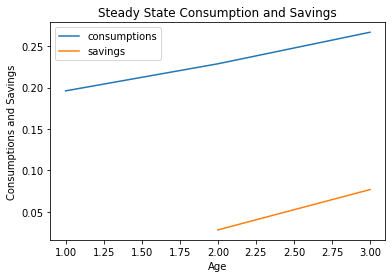

In [27]:
params2  = (0.55, sigma, nvec, sum(nvec), A, alpha, delta, SS_tol)
ss_output2 = get_SS(params2, bvec_guess, True)
ss_output2

When beta increases, the consumptions, savings, and wage increase accordingly, and interest rate decreases. The story behind this is that people tend to focus more on the future, which leads to higher savings and thus decreasing the interest rate. Higher savings means higher capital in firms, which increases the wages and consumption. 

# 2.3

In [145]:
def get_r(K, L, alpha, delta, A):
    return A * alpha * ((L / K) ** (1 - alpha)) - delta
def get_w(K, L, alpha, A):
    return A * (1 - alpha) * ((K / L) ** alpha)
def get_cons(b_s, b_s_1, n_s, r, w):
    return w * n_s + (1 + r) * b_s - b_s_1
def get_MU(c, sigma):
    return c ** (-sigma)
def get_Y(K, L, alpha, A):
    return A * (K ** alpha) * (L ** (1-alpha))

In [146]:
def timepath(K_path_update, K_init, K_ss, T, A, alpha, delta, nvec, m, Type):
    path = np.zeros([T + m, 4])
    period_path  = np.arange(1, T + m +1)
    if Type == "linear":
        K_path = np.linspace(K_init, K_ss, num = T)
    if Type == "update":
        K_path = K_path_update
    path[: , 0] = period_path
    path[: -m, 1] = K_path
    path[-m: , 1] = K_ss
    path[: , 2] = get_w(path[: , 1], nvec.sum(), alpha, A)
    path[: , 3] = get_r(path[: , 1], nvec.sum(), alpha, delta, A)
    return path

In [147]:
def solve_path(path, *args):
    bvec_init_val, T, m, beta, alpha, delta, sigma, A, nvec, bvec_ss = args
    b_mat = np.zeros([T + m, 3])
    b_mat[0, 0:-1] = bvec_init_val
    def get_b32(b32, *args):
        r2, r3, b21, w2, w3, beta, sigma, nvec = args
        c2  = get_cons(b21, b32, nvec[1], r2, w2)
        c3  = get_cons(b32, 0, nvec[2], r3, w3)
        MU2 = get_MU(c2)
        MU3 = get_MU(c3)
        error =  MU2 - beta * (1 + r3) * MU3
        return error
    b32_init = 0.1
    b32_args  = (path[0 , 3], path[1 , 3], b_mat[0 , 0], path[0 , 2], path[1 , 2], beta, sigma, nvec)
    b32 = opt.root(get_b32, b32_init, args = (b32_args))
    b32 = b32.x
    b_mat[1 , 1] = b32
    for i in range(path.shape[0]-2):
        w1 = path[i - 1 , 2]
        w2 = path[i , 2]
        w3 = path[i + 1 , 2]
        r2 = path[i , 3]
        r3 = path[i + 1, 3]
        ts_args = (w1, w2, w3, r2, r3, beta, alpha, delta, sigma, A, nvec)
        bvec_ts = opt.root(EulErr, bvec_init, args = (ts_args))
        b_mat[i , 0] = bvec_ts.x[0]
        b_mat[i + 1, 1] = bvec_ts.x[1]
    b_mat[: , 2] = b_mat[: , 0] + b_mat[: , 1]
    return b_mat

In [148]:
def EulErr(bvec, *args):
    w1, w2, w3, r2, r3, beta, alpha, delta, sigma, A, nvec = args
    b2, b3 = bvec
    L = nvec.sum()
    K = get_K(b2,b3)
    c1 = get_cons(0, b2, nvec[0], r2, w1)
    c2 = get_cons(b2, b3, nvec[1], r2, w2)
    c3 = get_cons(b3, 0, nvec[2], r3, w3)
    MU1 = get_MU(c1)
    MU2 = get_MU(c2)
    MU3 = get_MU(c3)
    Eul1 = MU1 - beta*(1+r2) * MU2
    Eul2 = MU2 - beta*(1+r3) * MU3
    Euler_errs = np.array([Eul1, Eul2])
    return Euler_errs

In [149]:
def TPI(path_init, xival, tol, *args):
    bvec_init, T, m, beta, alpha, delta, sigma, A, nvec, bvec_ss, K_ss = args
    b_mat = np.zeros([T + m, 3])
    b_mat[0, 0:-1] = bvec_init
    b_HH_init  = solve_path(path_init, bvec_init, T, m, beta, alpha, delta, sigma, A, nvec, bvec_ss)
    diff_init = sum(((path_init[: -m, 1] - b_HH_init[: -m, 2])/path_init[: -m, 1])**2)
    if diff_init > tol:
        path = path_init
        b_HH = b_HH_init
        diff = diff_init
        iter_num = 0
        while diff > tol:
            update = xival * b_HH[: -m, 2] + (1 - xival) * path[: -m, 1]
            path = timepath(update, 0, K_ss, T, A, alpha, delta, nvec, m, "update")
            b_HH = solve_path(path, bvec_init, T, m, beta, alpha, delta, sigma, A, nvec, bvec_ss)
            diff = sum(((path[: -m, 1] - b_HH[: -m, 2])/path[: -m, 1])**2)
            iter_num = iter_num + 1
            print("iteration: ", iter_num, "  difference: ", diff)

        result = (path, b_HH)
    else:
        result =  (path_init, b_HH_init)
    return result

a)

In [127]:
xival = 0.1
tol = 1e-9
bvec_init = np.array([0.8 * ss_output1['b_ss'][0], 1.1 * ss_output1['b_ss'][1]])
T = 25
m = 25
bvec_ss = ss_output1['b_ss']
K_ss = ss_output1['K_ss']
K_init = bvec_init.sum()

path_init = timepath(0, K_init, K_ss, T, A, alpha, delta, nvec, m, "linear")

In [128]:
path = TPI(path_init, xival, tol,  bvec_init, T, m, beta, alpha, delta, sigma, A, nvec, bvec_ss, K_ss)

iteration:  1   difference:  0.0026923268543442304
iteration:  2   difference:  0.002157561740107384
iteration:  3   difference:  0.0017408174700849325
iteration:  4   difference:  0.0014142121894262733
iteration:  5   difference:  0.0011567365684827385
iteration:  6   difference:  0.0009525098783005804
iteration:  7   difference:  0.0007894893845593562
iteration:  8   difference:  0.0006585123205853974
iteration:  9   difference:  0.0005525827671266743
iteration:  10   difference:  0.0004663394689037951
iteration:  11   difference:  0.00039565771612220233
iteration:  12   difference:  0.0003373508229514696
iteration:  13   difference:  0.00028894577394323863
iteration:  14   difference:  0.00024851422573664284
iteration:  15   difference:  0.00021454491036903037
iteration:  16   difference:  0.00018584706684335225
iteration:  17   difference:  0.00016147717292832388
iteration:  18   difference:  0.00014068320855806213
iteration:  19   difference:  0.00012286213677220782
iteration:  20

In [129]:
K_path = path[0][:, [0 , 1]]
w_path = path[0][:, [0 , 2]]
r_path = path[0][:, [0 , 3]]
b_path = path[1][:,:2]

In [130]:
Eulerr_path = np.zeros((30, 2))
RCerr_path = np.zeros(30)
for i in range(30):
    if i == 0:
        rt = rt1 = r_path[0,1]
        wt = wt1 = w_path[0,1]
        b2t = b2t1 = b_path[0, 0]
        b3t = b3t1 = b_path[0, 1]
    else:
        rt, rt1 = r_path[i, 1], r_path[i-1, 1]
        b2t, b3t = b_path[i,:]
        b2t1, b3t1 = b_path[i-1, :]
        wt, wt1 = w_path[i,1], w_path[i-1, 1]
    Kt = K_path[i,1]
    Kt_1 = K_path[i+1, 1]
    Yt = get_Y(Kt, nvec.sum(), alpha, A)
    c1t = get_cons(0, b2t, nvec[0], rt, wt)
    c2t = get_cons(b2t1, b3t, nvec[1], rt1, wt)
    c3t = get_cons(b3t1, 0, nvec[2], rt1, wt)
    Ct = c1t + c2t + c3t
    RCerr_path[i] = Yt - Ct - Kt_1 + (1 - delta) * Kt
    Eulerr_path[i, :] = Equation_2(b_path[i, :], w_path[i,1], w_path[i+1,1], w_path[i+2,1], r_path[i+1,1], r_path[i+2,1], \
                               beta, alpha, delta, sigma, A, nvec)
    
print('Maximum of the absolute values of all the Euler errors across the entire time path:', 
      np.abs(Eulerr_path).max())
print('Maximum of the absolute values of all the resource constraint errors across the entire time path:', 
      np.abs(RCerr_path).max())

Maximum of the absolute values of all the Euler errors across the entire time path: 37.40392775466482
Maximum of the absolute values of all the resource constraint errors across the entire time path: 0.0057734276923919435


b)

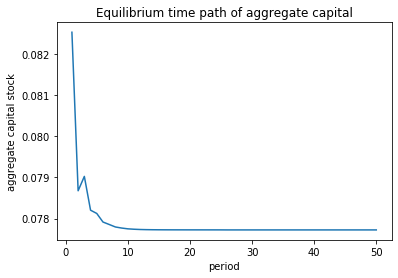

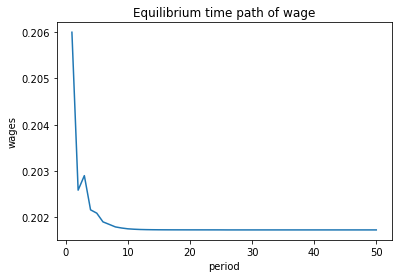

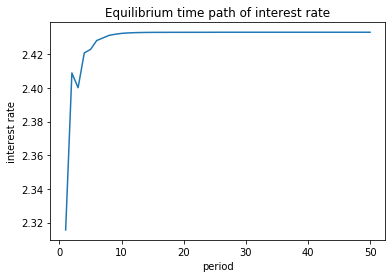

In [132]:
plt.plot(K_path[: , 0], K_path[: , 1], label='Capital')
plt.title('Equilibrium time path of aggregate capital')
plt.xlabel('period')
plt.ylabel('aggregate capital stock')
plt.show()

plt.plot(w_path[: , 0], w_path[: , 1], label='Wage')
plt.title('Equilibrium time path of wage')
plt.xlabel('period')
plt.ylabel('wages')
plt.show()

plt.plot(r_path[: , 0], r_path[: , 1], label='Interest rate')
plt.title('Equilibrium time path of interest rate')
plt.xlabel('period')
plt.ylabel('interest rate')
plt.show()

c)

In [143]:
for i in range(50):
    K = K_path[i, 1]
    if abs(K - K_ss) <= 0.00001:
        print('Number of periods until getting within 0.00001 of the steady-state aggregate capital stock: {} periods '.format(int(K_path[i, 0])))
        break
        
for i in range(50):
    K_mat = K_path[i:, 1]
    Diff = np.abs(K_mat - K_ss)
    if np.sum(Diff > 0.00001) == 0:
        print("After period {}, the aggregate capital stock never is again farther than 0.00001 away from the steady-state.".format(int(K_path[i, 0])))
        break

Number of periods until getting within 0.00001 of the steady-state aggregate capital stock: 13 periods 
After period 13, the aggregate capital stock never is again farther than 0.00001 away from the steady-state.
